# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel("/content/drive/MyDrive/BCG_CHATBOT/10 K data.xlsx")

In [4]:
client_df = pd.read_csv('/content/drive/MyDrive/BCG DS/client_data.csv')
price_df = pd.read_csv('/content/drive/MyDrive/BCG DS/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])
# Assuming 'client_df' is your DataFrame
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for col in date_columns:
    if col in client_df.columns:
        client_df[col] = pd.to_datetime(client_df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Now check the data types again
client_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [10]:
# Check for ID overlap
common_ids = set(client_df['id']).intersection(set(price_df['id']))
print(f"Number of common IDs: {len(common_ids)}")
print(f"Percentage of client_df IDs in price_df: {len(common_ids) / len(client_df) * 100:.2f}%")
print(f"Percentage of price_df IDs in client_df: {len(common_ids) / len(price_df) * 100:.2f}%")

# Check for duplicates in client_df
print(f"Duplicate customer IDs in client_df: {client_df['id'].duplicated().sum()}")

# Check for duplicates in price_df
print(f"Duplicate customer IDs in price_df: {price_df['id'].duplicated().sum()}")


Number of common IDs: 14606
Percentage of client_df IDs in price_df: 100.00%
Percentage of price_df IDs in client_df: 7.57%
Duplicate customer IDs in client_df: 0
Duplicate customer IDs in price_df: 176906


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [11]:

client_df.describe(include=np.number)


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [12]:
price_df.describe(include=np.number)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [13]:
client_df['churn'].value_counts(normalize = True)*100

,proportion
churn,
0,90.284814
1,9.715186


In [14]:
client_df['channel_sales'].value_counts(normalize = True)*100

,proportion
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,46.241271
MISSING,25.503218
lmkebamcaaclubfxadlmueccxoimlema,12.618102
usilxuppasemubllopkaafesmlibmsdf,9.413939
ewpakwlliwisiwduibdlfmalxowmwpci,6.113926
sddiedcslfslkckwlfkdpoeeailfpeds,0.075312
epumfxlbckeskwekxbiuasklxalciiuu,0.020540
fixdbufsefwooaasfcxdxadsiekoceaa,0.013693


In [15]:
# Extract the month-year for grouping
client_df['activation_month'] = client_df['date_activ'].dt.to_period('M')
client_df['churn_month'] = client_df['date_end'].dt.to_period('M')

# Compute Acquisition Rate (New customers per month)
acquisition_counts = client_df.groupby('activation_month')['id'].count()

# Compute Churn Rate (Customers leaving per month)
churn_counts = client_df.groupby('churn_month')['id'].count()

# Create a common date range
all_months = pd.period_range(start=client_df['activation_month'].min(),
                             end=client_df['churn_month'].max(), freq='M')

# Ensure all months are in both series
acquisition_counts = acquisition_counts.reindex(all_months, fill_value=0)
churn_counts = churn_counts.reindex(all_months, fill_value=0)

# Compute Net Growth Rate
net_growth = acquisition_counts - churn_counts

monthly_acquisition = client_df.groupby(client_df['date_activ'].dt.to_period('M'))['id'].count()



---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations.

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

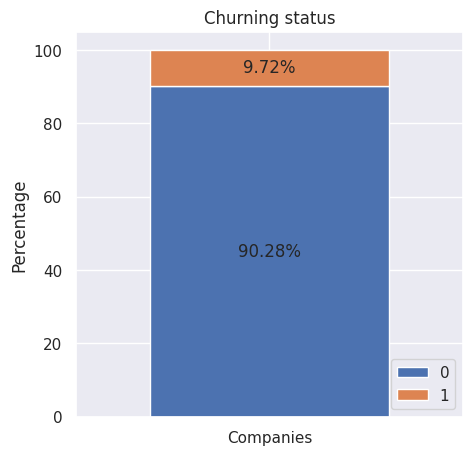

In [17]:
def plot_stacked_bars(data, title, size=(18, 10), legend_="upper right"):
    """
    Plots a stacked bar chart with data labels.

    Args:
        data (pandas.DataFrame): DataFrame containing the data to plot.
        title (str): Title of the plot.
        size (tuple): Size of the plot.
        legend_ (str): Location of the legend.
    """
    # Create stacked bar chart
    ax = data.plot(kind="bar", stacked=True, figsize=size, width=0.8)

    # Customize plot
    plt.title(title)
    plt.legend(loc=legend_)
    plt.xlabel(data.index.name)  # Set x-axis label to the index name
    plt.ylabel("Percentage")     # Set y-axis label to "Percentage"
    plt.xticks(rotation=0)

    # Add data labels
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()

churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

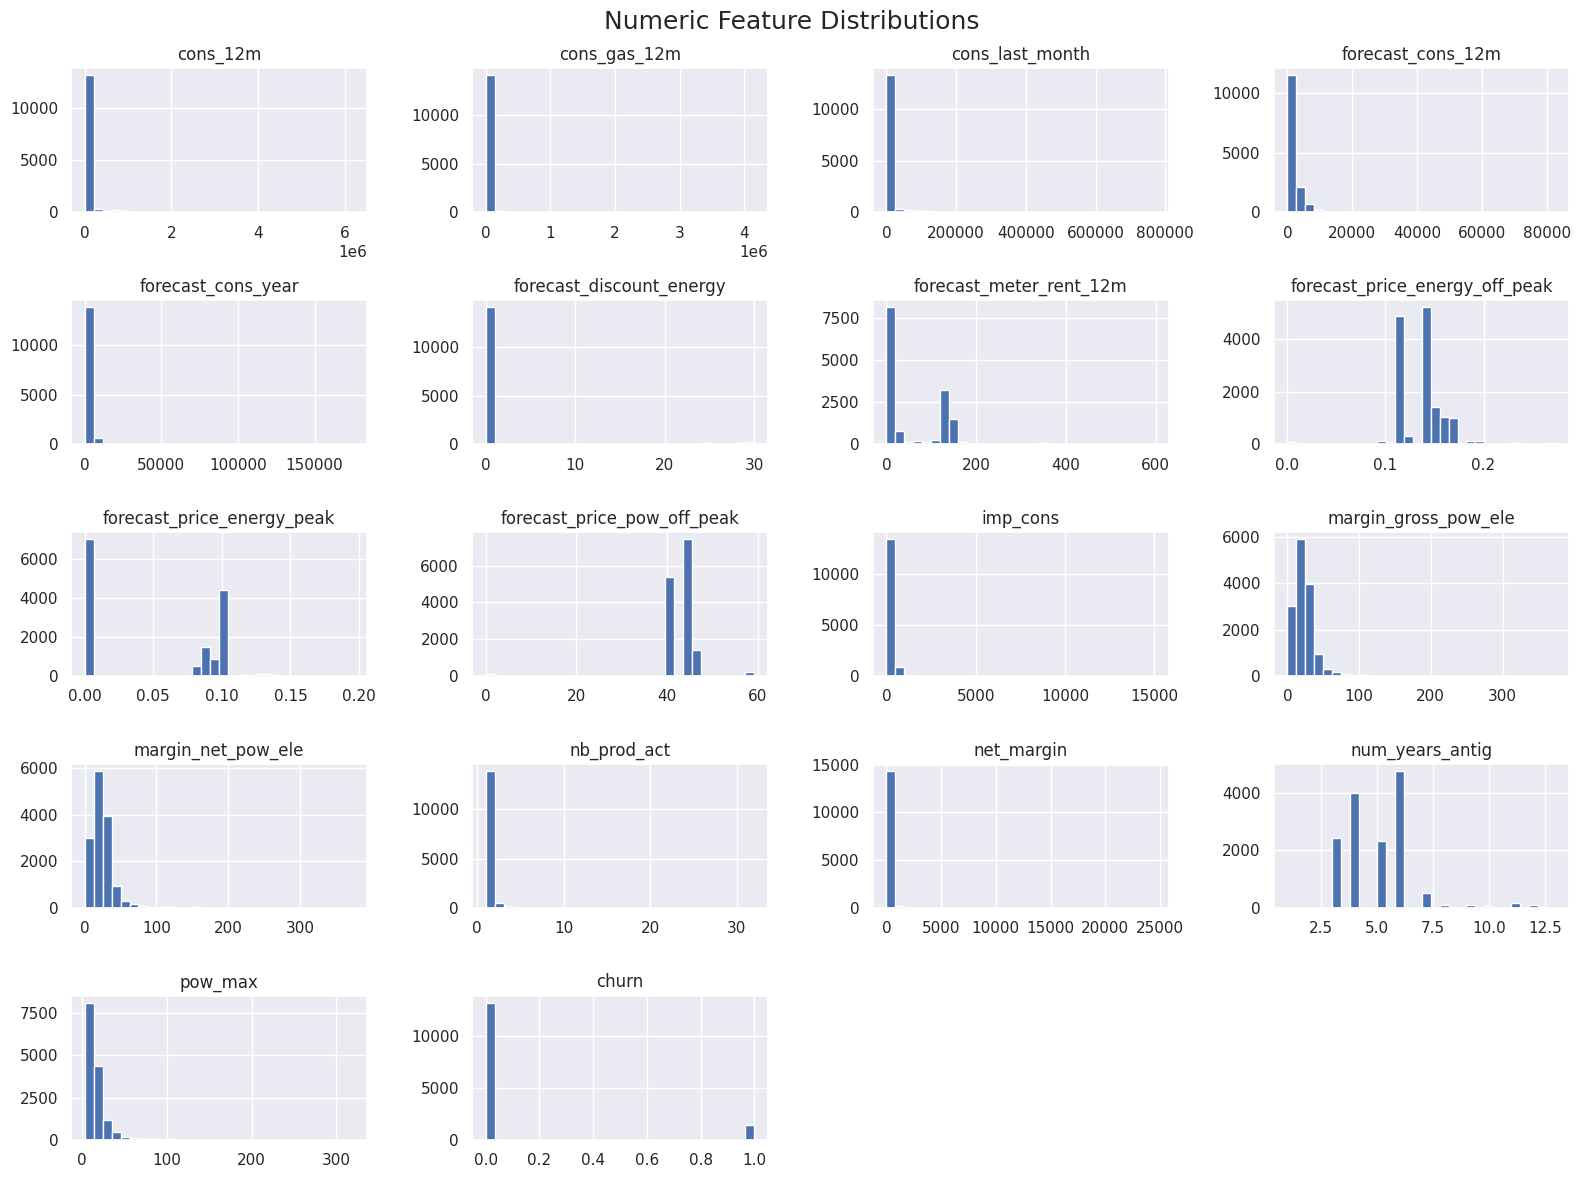

In [18]:
  # Select all numeric columns
numeric_cols = client_df.select_dtypes(include='number').columns

# Plot histograms of all numeric columns (no hue/churn separation)
client_df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Numeric Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()


The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

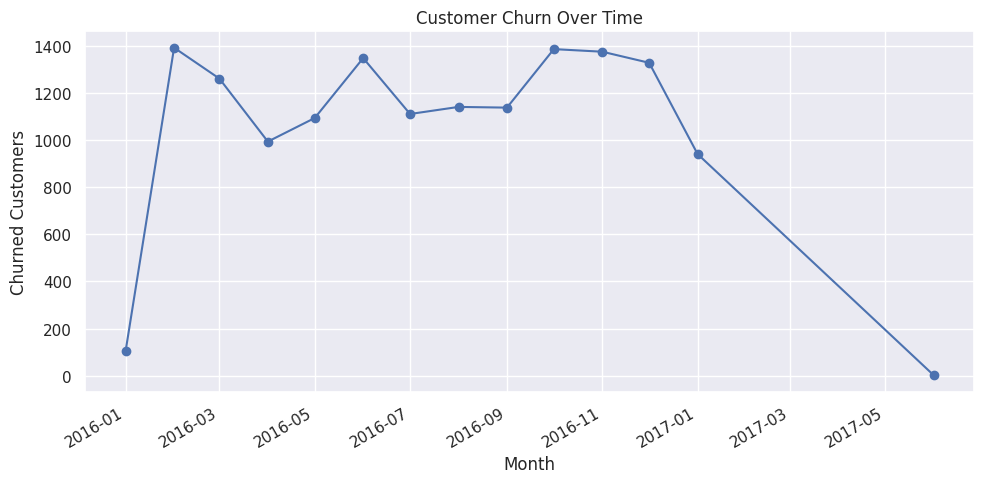

In [19]:
monthly_churn = client_df.groupby('churn_month').size()
monthly_churn.index = monthly_churn.index.to_timestamp()
monthly_churn.plot(kind='line', title='Customer Churn Over Time', figsize=(10, 5), marker='o')
plt.xlabel('Month')
plt.ylabel('Churned Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


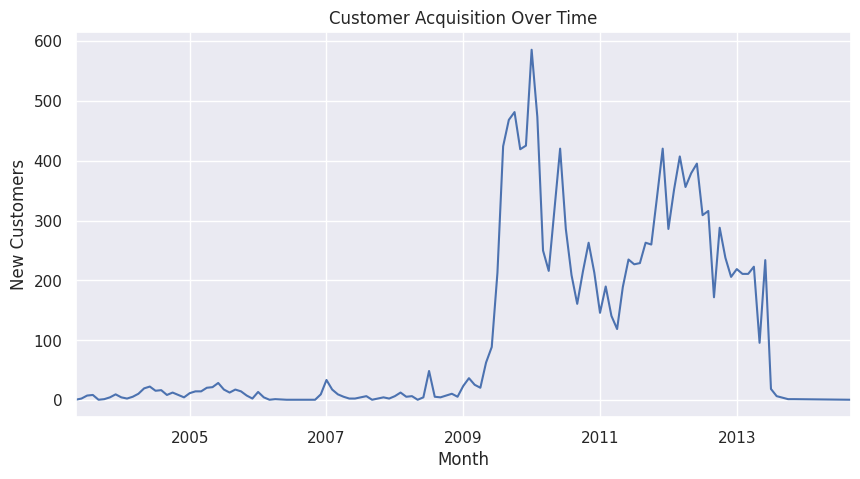

In [20]:
monthly_acquisition.plot(kind='line', title='Customer Acquisition Over Time', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.show()

<Axes: xlabel='churn', ylabel='cons_12m'>

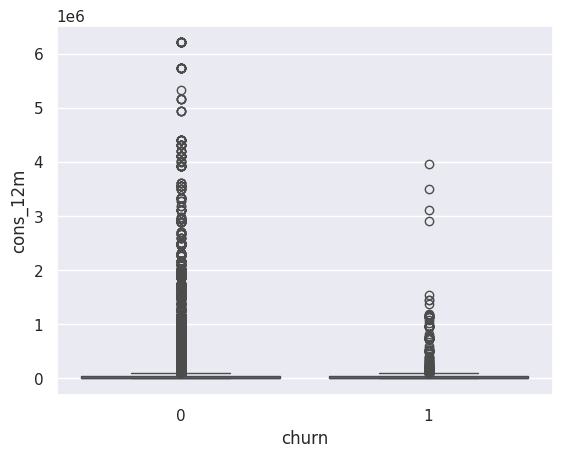

In [21]:
sns.boxplot(x='churn', y='cons_12m', data=client_df)


<Axes: xlabel='churn', ylabel='num_years_antig'>

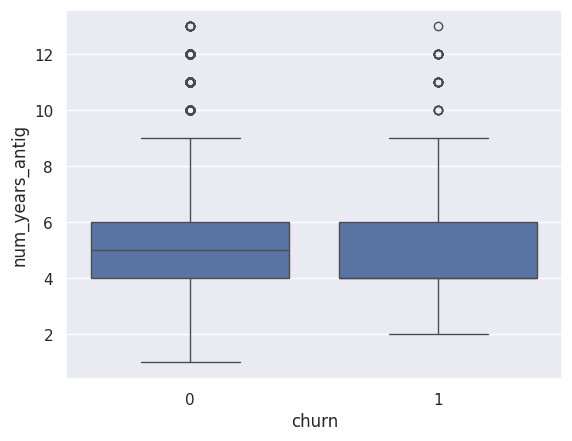

In [22]:
sns.boxplot(x='churn', y='num_years_antig', data=client_df)


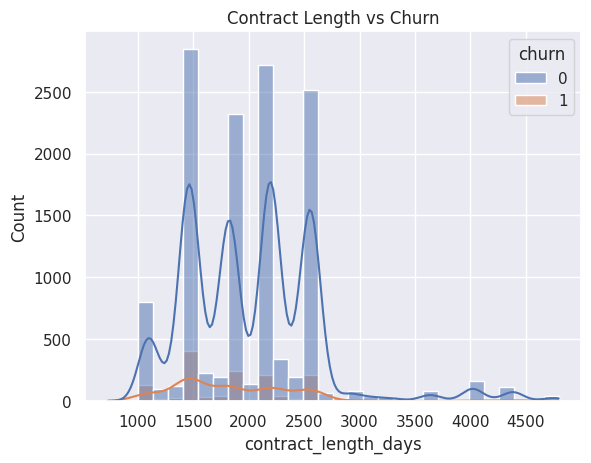

In [23]:
client_df['contract_length_days'] = (client_df['date_end'] - client_df['date_activ']).dt.days

sns.histplot(client_df, x='contract_length_days', hue='churn', bins=30, kde=True)
plt.title('Contract Length vs Churn')
plt.show()


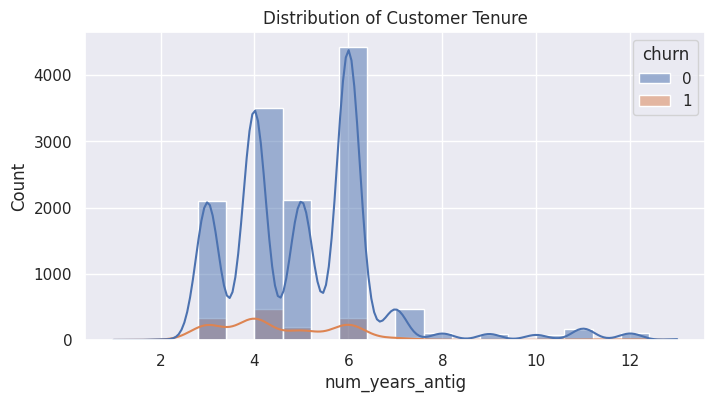

In [24]:
# Histogram of customer tenure
plt.figure(figsize=(8,4))
# Corrected the x parameter to be the column name as a string
sns.histplot(client_df,x='num_years_antig',hue='churn', bins=20, kde=True, color='blue')
plt.title('Distribution of Customer Tenure')
# plt.xlabel('Years as Customer')
# plt.ylabel ('Count')
plt.show()

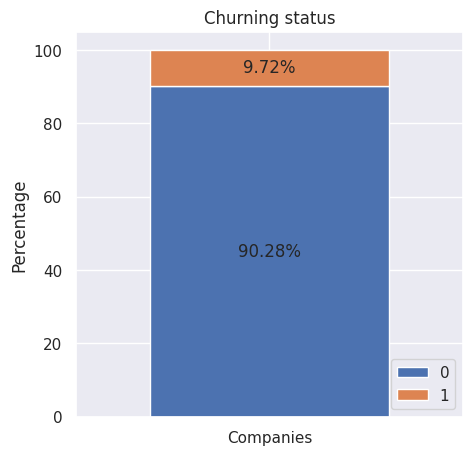

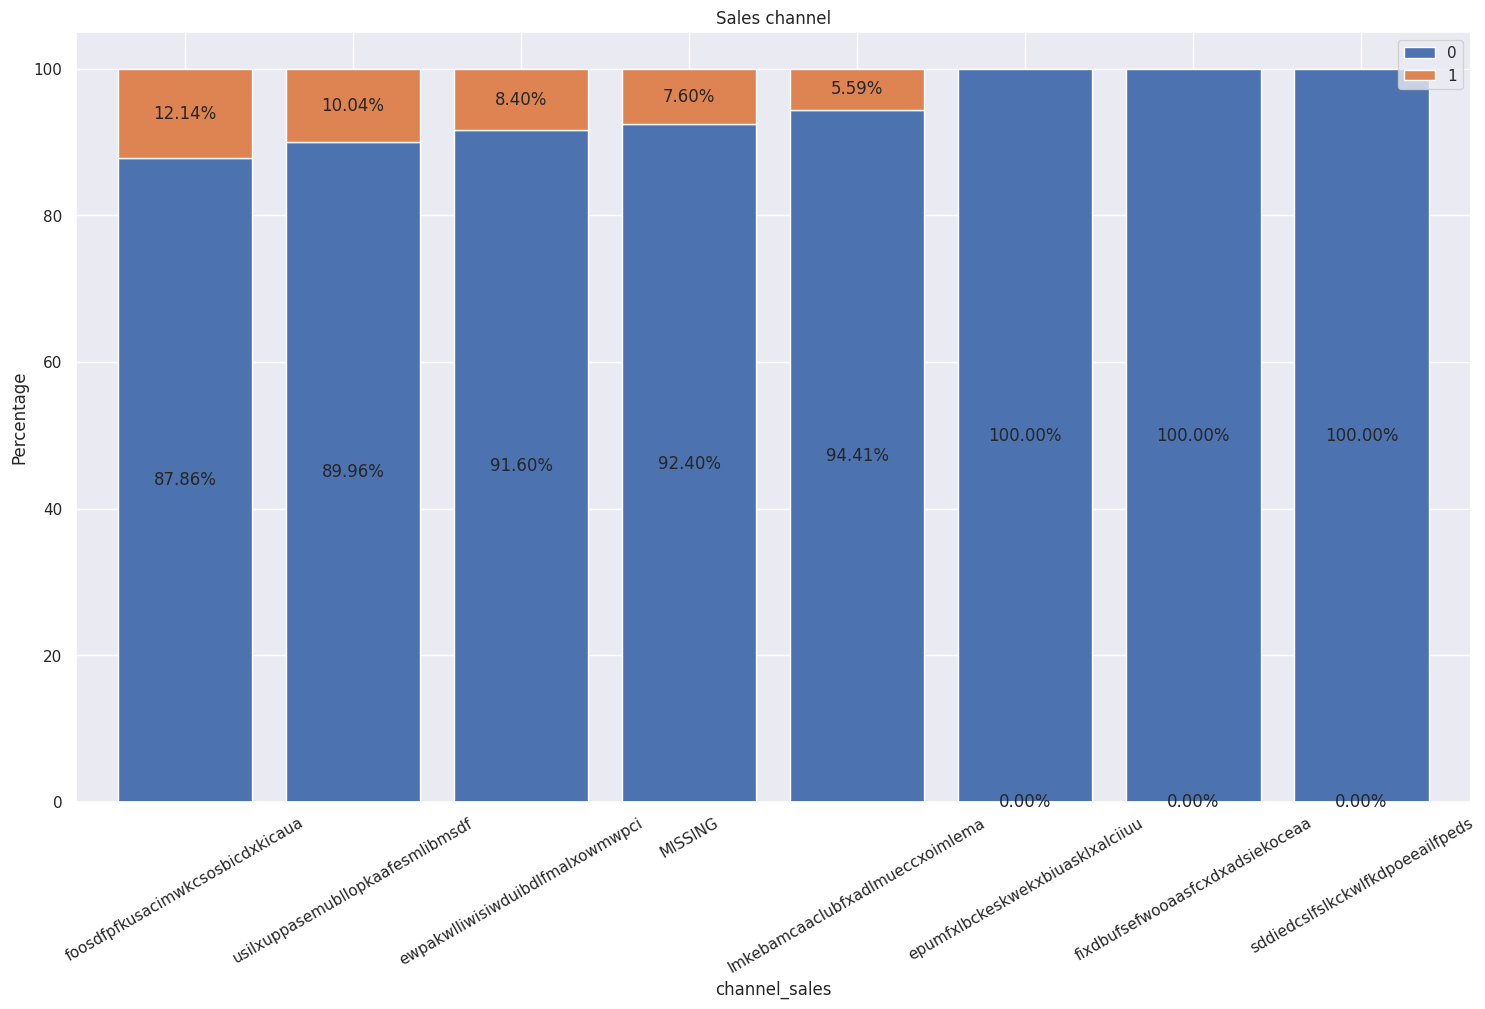

In [25]:
def plot_stacked_bars(data, title, size=(18, 10), legend_="upper right", rot=0):
    """
    Plots a stacked bar chart with data labels.

    Args:
        data (pandas.DataFrame): DataFrame containing the data to plot.
        title (str): Title of the plot.
        size (tuple): Size of the plot.
        legend_ (str): Location of the legend.
        rot (int): Rotation angle for x-axis labels. # Added rot parameter
    """
    # Create stacked bar chart
    ax = data.plot(kind="bar", stacked=True, figsize=size, width=0.8)

    # Customize plot
    plt.title(title)
    plt.legend(loc=legend_)
    plt.xlabel(data.index.name)  # Set x-axis label to the index name
    plt.ylabel("Percentage")     # Set y-axis label to "Percentage"
    plt.xticks(rotation=rot) # Use the 'rot' parameter for rotation

    # Add data labels
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()

# Function call remains the same
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

# This is the original code block that caused the error, now it will work
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, 'Sales channel',rot=30)

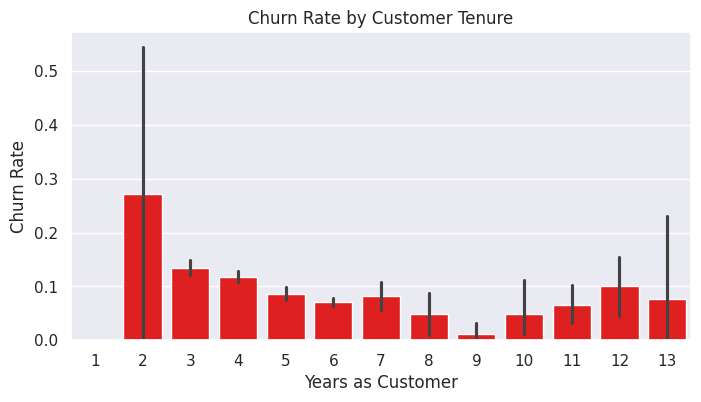

In [26]:
# Churn rate by tenure
plt.figure(figsize=(8,4))
sns.barplot(x=client_df['num_years_antig'], y=client_df['churn'], estimator=lambda x: sum(x)/len(x), color='red')
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Years as Customer')
plt.ylabel('Churn Rate')
plt.show()



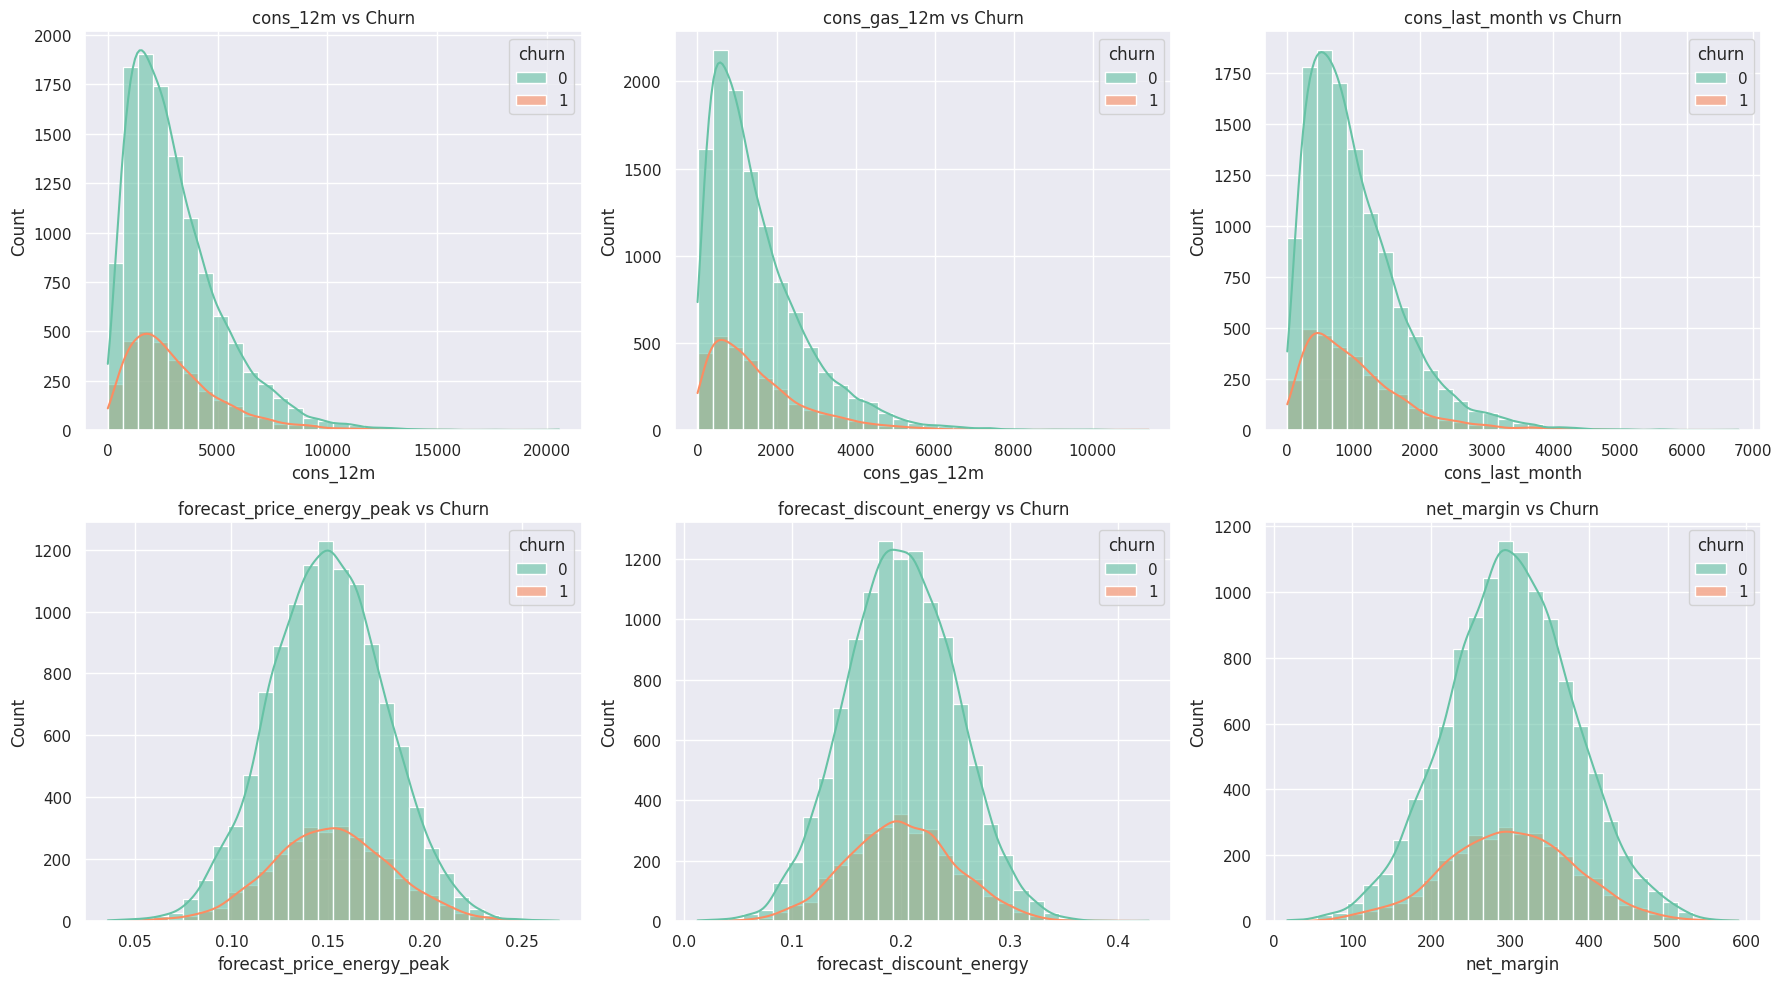

In [28]:
# Simulate structure of client_df with essential columns for churn analysis
np.random.seed(42)
n = 14606
client_df = pd.DataFrame({
    'cons_12m': np.random.gamma(2, 1500, n),
    'cons_gas_12m': np.random.gamma(1.5, 1000, n),
    'cons_last_month': np.random.gamma(2, 500, n),
    'imp_cons': np.random.gamma(2, 1200, n),
    'forecast_cons_12m': np.random.gamma(2, 1400, n),
    'forecast_discount_energy': np.random.normal(0.2, 0.05, n),
    'forecast_price_energy_peak': np.random.normal(0.15, 0.03, n),
    'net_margin': np.random.normal(300, 80, n),
    'contract_length_years': np.random.uniform(0.5, 5, n),
    'num_years_antig': np.random.randint(1, 10, n),
    'nb_prod_act': np.random.randint(1, 5, n),
    'churn': np.random.choice([0, 1], size=n, p=[0.8, 0.2])
})

# Select important numeric columns for churn distribution analysis
important_cols = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month',
    'forecast_price_energy_peak', 'forecast_discount_energy',
    'net_margin'
]

# Plot in subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.histplot(data=client_df, x=col, hue='churn', kde=True, ax=axes[i], bins=30, palette='Set2', alpha=0.6)
    axes[i].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


 EDA Insights & Conclusions

**1. Distribution vs Churn**

The histograms compare churned vs. retained customers for various features:

cons_12m, cons_gas_12m, cons_last_month:
Churned and retained customers have similar distributions, but churned users tend to cluster more toward the lower range — indicating lower consumption might correlate with churn.

forecast_price_energy_peak:
Distributions are similar, though churned customers slightly lean toward higher peak prices — possibly a factor for churn.

forecast_discount_energy:
Churned customers show slightly less favorable discounts — potentially pushing them to switch providers.

net_margin:
The churned segment appears centered around lower margins, which may indicate less profitable customers tend to leave.

**2. Correlation**

The churn column shows weak correlation (all < 0.1) with most features.

Slight negative correlation with cons_12m, cons_last_month, net_margin, contract_length — reinforcing earlier observations:

Lower usage and margin → higher churn probability.

Very strong correlations exist between:

contract_length_days and contract_length (1.0 — same feature scaled).

cons_12m and cons_last_month (0.97) — very similar behavior.

forecast_cons_year and forecast_cons_12m (0.65+) — expected.